In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm

##Beale function

$$
z = (1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2
$$

With absolute minimum in 

$$(\hat{x},\hat{y})=(3,0.5)$$

In [8]:
#Contour plot for beale function
def contour_beales_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.2), np.arange(-4.5, 4.5, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=beales_function(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(3,0.5, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-4.5, 4.5))
    ax.set_ylim((-4.5, 4.5))
    
    return fig,ax


#Utility to plot beales contours
def plot_surface(x, y, z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r", xlimL=1, xlimH=1, ylimL=1, ylimH=1, zlimL=2, zlimH=2):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': -2, 'vmax': 2}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-xlimL, xlimH)
    ax.set_ylim(-ylimL, ylimH)
    ax.set_zlim(-zlimL, zlimH)
    
    plt.xticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    plt.yticks([-1, -0.5, 0, 0.5, 1], ["-1", "-1/2", "0", "1/2", "1"])
    ax.set_zticks([-2, -1, 0, 1, 2])
    ax.set_zticklabels(["-2", "-1", "0", "1", "2"])
    
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax;

In [13]:
#Beale function
def beales_function(theta,features,target):
    x=theta[0]
    y=theta[1]
    return np.square(1.5-x+x*y)+np.square(2.25-x+x*y*y)+np.square(2.625-x+x*y**3)
    

#Beale gradient
def grad_beales_function(theta,features):
    x=theta[0]
    y=theta[1]
    grad_x=2*(1.5-x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x+x*y**3)*(-1+y**3)
    grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
    gradient=np.array([grad_x,grad_y])
    return gradient

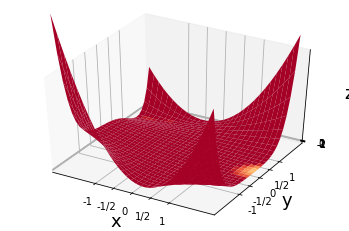

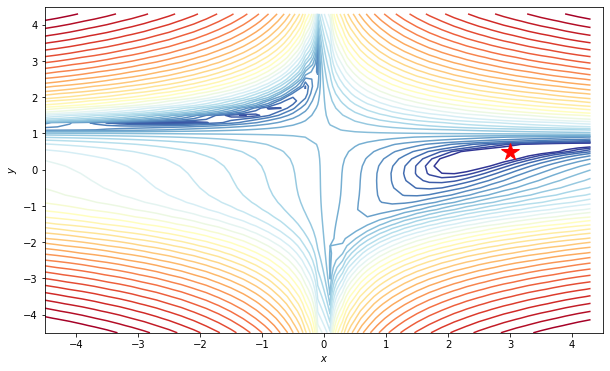

In [12]:

x, y = np.mgrid[-2:2:31j, -2:2:31j] 
fig,ax=plot_surface(x,y,beales_function(x,y),xlimL=2.1, xlimH=2.1, ylimL=2.1, ylimH=2.1, zlimL=0,zlimH=300)

#Beale function contour plot
fig1,ax1 =contour_beales_function()
plt.show()

##PER ANIMARE IL PLOT
https://towardsdatascience.com/gradient-descent-animation-1-simple-linear-regression-e49315b24672

In [22]:
def gradient_descent(theta, features, target, lr, num_steps,loss,gradient_function):
    '''
    Function to execute the gradient ascent algorithm

    Input:
    theta: the model parameter matrix.
    target: the label array
    num_steps: the number of iterations 
    features: the input data matrix. The shape is (N, H)
    lr: the learning rate
    
    Output:
    theta: the final model parameter matrix.
    log_likelihood_history: the values of the log likelihood during the process
    '''

    loss_history = np.zeros(num_steps)
    x=theta[0]
    y=theta[1]
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    for step in range(num_steps):
      
        loss_history[step]=loss(theta,features,target)
        #gradient=gradient_function(theta,features)
        grad_x=2*(1.5-x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x+x*y**3)*(-1+y**3)
        grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
        gradient=np.array([grad_x,grad_y])

        theta=theta-lr*gradient
            
    return theta, loss_history


In [25]:
# Initialize theta0
theta0 = np.zeros(2)

# Run Gradient Ascent method
n_iter=1000
theta_final, log_l_history = gradient_descent(theta0,x,y,lr=0.1,num_steps=n_iter,loss=beales_function,gradient_function=grad_beales_function)
print(theta_final)
#plt.plot(log_l_history)

[12.75  0.  ]
